In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout ,GlobalAveragePooling2D,Rescaling, Input , BatchNormalization,AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.backend import clear_session

from tensorflow.keras.applications import InceptionResNetV2,InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.xception import Xception
import matplotlib.pyplot as plt

In [ ]:
train_dir="/content/drive/MyDrive/archive/train"
valid_dir="/content/drive/MyDrive/archive/valid"

In [ ]:
DIMS = (224,224)
IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42
data_gen = ImageDataGenerator(rescale=1/255)
train_data = data_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,target_size=DIMS, class_mode='categorical')

val_data = data_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=valid_dir, shuffle=True,target_size=DIMS, class_mode='categorical')

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [ ]:
dog_data=pd.read_csv("/content/drive/MyDrive/archive/dogs.csv")

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.001)
es = EarlyStopping(monitor='loss', verbose=2, patience=10, min_delta=0.001)

In [ ]:
input_shape = (224, 224, 3)
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(70, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

In [ ]:
new_turn_model= model.fit(train_data, validation_data=val_data,epochs=60, verbose=1, callbacks=[reduce_lr,es])
model.save('new_turn_model.keras')
!cp "/content/new_turn_model.keras" "/content/drive/MyDrive"

Epoch 1/60
249/249 [==============================] - 2223s 9s/step - loss: 4.1029 - accuracy: 0.0373 - val_loss: 4.2678 - val_accuracy: 0.0300 - lr: 0.0010
Epoch 2/60
249/249 [==============================] - 44s 176ms/step - loss: 3.9161 - accuracy: 0.0604 - val_loss: 4.1990 - val_accuracy: 0.0300 - lr: 0.0010
Epoch 3/60
249/249 [==============================] - 44s 178ms/step - loss: 3.7944 - accuracy: 0.0846 - val_loss: 3.8916 - val_accuracy: 0.0557 - lr: 0.0010
Epoch 4/60
249/249 [==============================] - 45s 180ms/step - loss: 3.7008 - accuracy: 0.0970 - val_loss: 3.7496 - val_accuracy: 0.0657 - lr: 0.0010
Epoch 5/60
249/249 [==============================] - 43s 173ms/step - loss: 3.6333 - accuracy: 0.1081 - val_loss: 4.2979 - val_accuracy: 0.0486 - lr: 0.0010
Epoch 6/60
249/249 [==============================] - 45s 181ms/step - loss: 3.5683 - accuracy: 0.1242 - val_loss: 3.8253 - val_accuracy: 0.0843 - lr: 0.0010
Epoch 7/60
249/249 [==============================] -

In [ ]:
gt=keras.saving.load_model("/content/new_turn_model.keras")

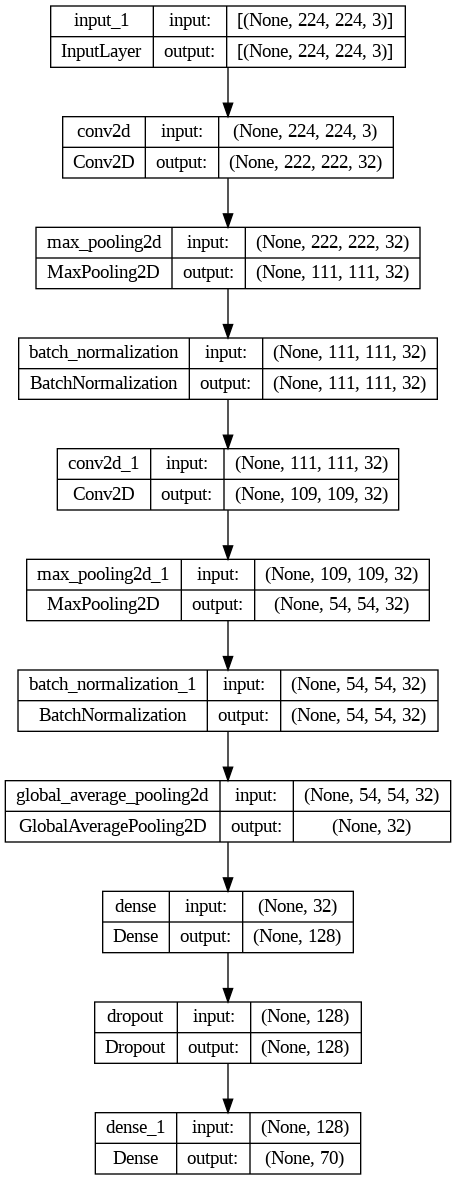

In [ ]:
tf.keras.utils.plot_model(
    model,

    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

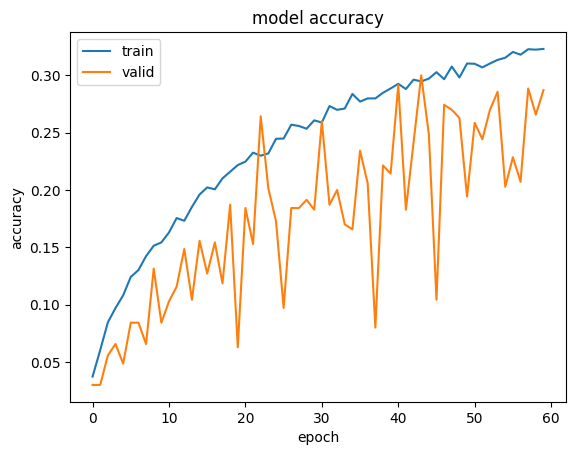

In [ ]:
plt.plot(new_turn_model.history['accuracy'])
plt.plot(new_turn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

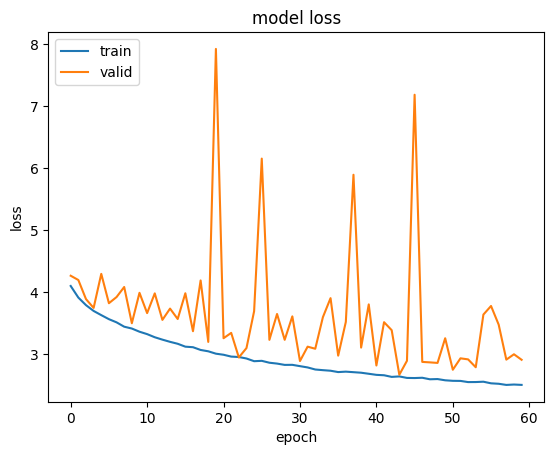

In [ ]:
plt.plot(new_turn_model.history['loss'])
plt.plot(new_turn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()